# Análisis Exploratorio de Datos (EDA) de Ofertas Inmobiliarias

Este análisis proporciona una exploración detallada de un conjunto de datos de ofertas inmobiliarias. A continuación, se presentan los pasos realizados:
1. **Análisis Descriptivo**: Resumen de estadísticas para las variables numéricas y categóricas.
2. **Visualización de Distribuciones**: Gráficas para explorar las distribuciones de precios, habitaciones, baños, etc.
3. **Análisis de Correlaciones**: Matriz de correlaciones para identificar relaciones entre variables numéricas.
4. **Insights y Conclusiones**: Observaciones clave derivadas del análisis.


### Importamos librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importemos la tabla

In [5]:
# Cargar el dataset
file_path = '../data/processed/cleaned_ofertas_inmobiliarias.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()



,Precio,Habitaciones,Baños,Parqueos,Sector,Condicion,Uso Actual,mt2,Piso/Nivel,Ascensor,Edificable,Agno Construccion,Planta Electrica,Seguridad 24 Horas,Control de Acceso,Piscina,Gimnasio
0,950.0,1,2.0,1,El Millón,Segundo Uso,Residencial,73.0,5.000000,True,No,2022.5,False,False,False,True,True
1,10640.0,4,4.5,5,Av. Anacaona,Segundo Uso,Residencial,611.0,5.824962,True,No,2020.0,True,True,True,True,True
2,10640.0,3,4.5,4,Av. Anacaona,Segundo Uso,Residencial,598.0,5.824962,True,No,2020.0,True,True,True,True,True
3,10640.0,3,4.5,2,Av. Anacaona,Segundo Uso,Residencial,598.0,5.824962,True,No,2020.0,True,True,True,True,True
4,10640.0,4,4.5,4,Av. Anacaona,Nueva,Residencial,615.0,14.000000,True,No,2023.0,True,True,True,True,False


### Análisis descriptivo de las variables numéricas

In [2]:
# Análisis descriptivo de las variables numéricas
desc_num = df.describe()

desc_num



,Precio,Habitaciones,Baños,Parqueos,mt2,Piso/Nivel,Agno Construccion
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,1796.961973,2.100719,2.390545,1.765673,151.510528,5.833389,2021.678314
std,1444.944274,0.873789,0.830299,0.721918,93.844382,3.177072,3.117934
min,493.000000,1.000000,1.000000,1.000000,45.720000,1.000000,1978.000000
25%,1000.000000,1.000000,1.500000,1.000000,92.000000,4.000000,2021.000000
50%,1350.000000,2.000000,2.500000,2.000000,150.000000,5.824962,2022.500000
75%,2000.000000,3.000000,3.000000,2.000000,169.000000,6.000000,2023.000000
max,10640.000000,10.000000,5.500000,6.000000,869.000000,27.000000,2024.000000


Aplicamos 

Grafico de Cajas Precio

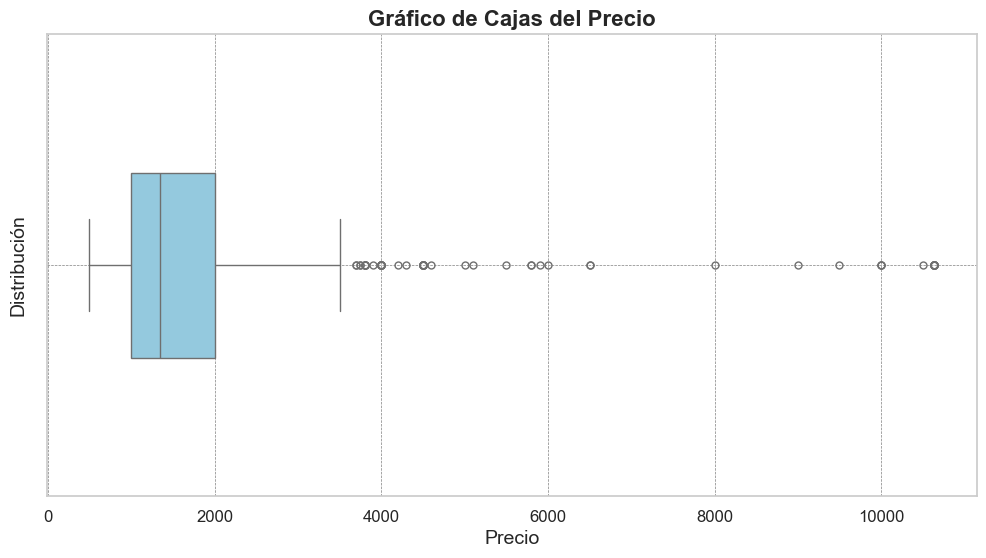

In [14]:
# Aplicar un estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el boxplot con una paleta de colores personalizada
sns.boxplot(data=df, x='Precio', color='skyblue', width=0.4, fliersize=5)

# Añadir título y etiquetas con fuentes personalizadas
plt.title('Gráfico de Cajas del Precio', fontsize=16, fontweight='bold')
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Distribución', fontsize=14)

# Añadir líneas de referencia para mejorar la legibilidad
plt.grid(color='grey', linestyle='--', linewidth=0.5)

# Personalizar los ejes y las marcas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

### Análisis descriptivo de las variables categóricas

In [3]:
# Análisis descriptivo de las variables categóricas
desc_cat = df.describe(include=['object'])

desc_cat

,Sector,Condicion,Uso Actual,Edificable
count,973,973,973,973
unique,56,4,3,2
top,Piantini,Segundo Uso,Residencial,No
freq,122,602,937,965


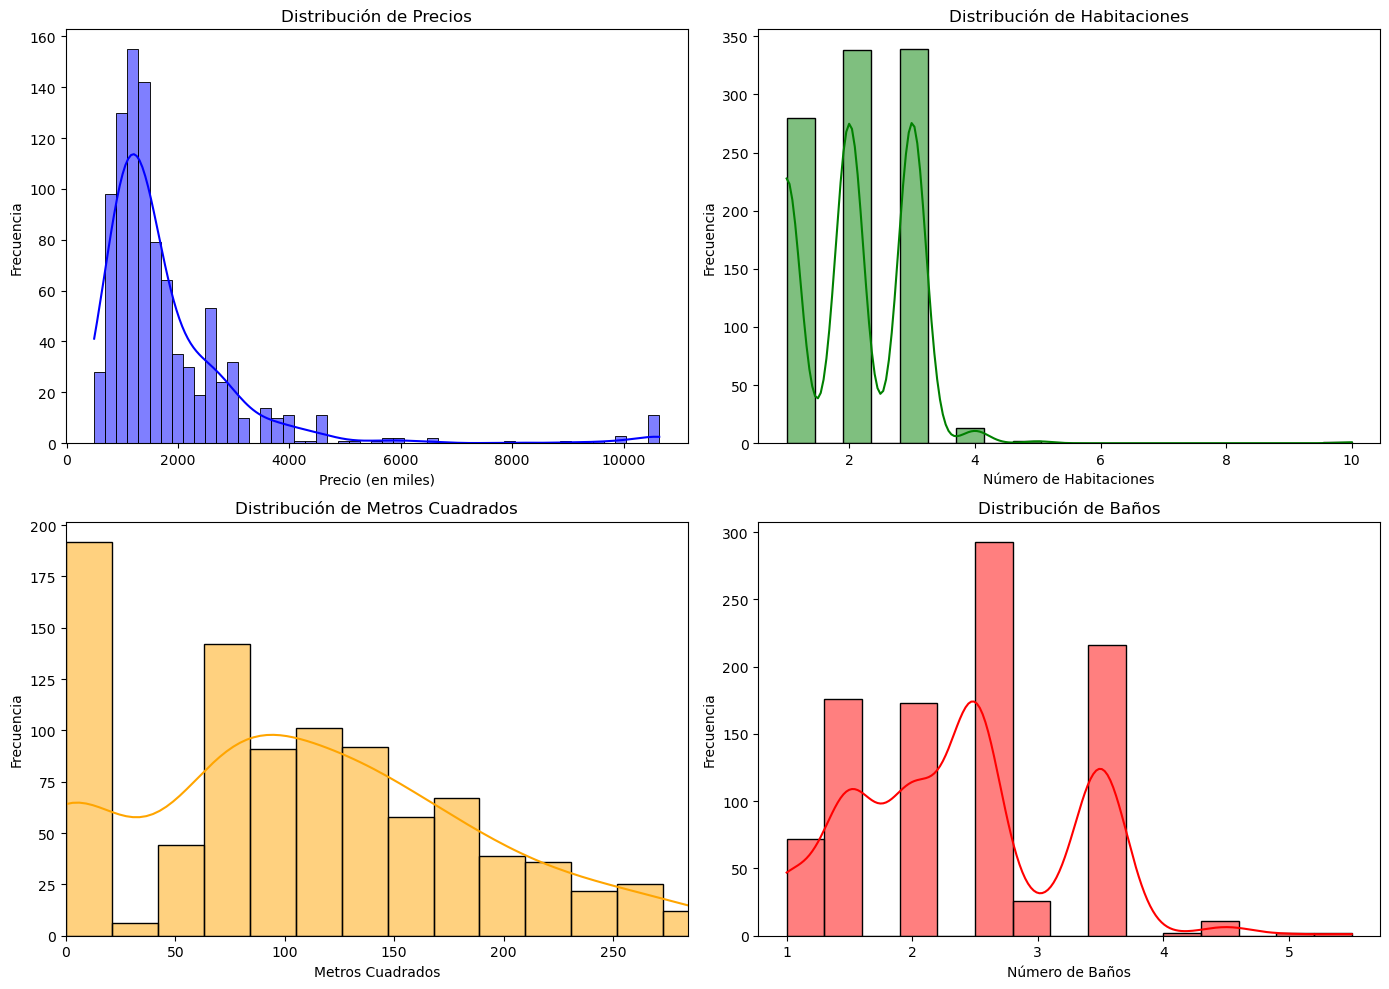

In [17]:

# Gráficas de distribución para variables numéricas clave
plt.figure(figsize=(14, 10))

# Precios
plt.subplot(2, 2, 1)
sns.histplot(df['Precio'], kde=True, color='blue')

plt.xlabel('Precio (en miles)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')

# Habitaciones
plt.subplot(2, 2, 2)
sns.histplot(df['Habitaciones'], kde=True, bins=20, color='green')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de Habitaciones')

# Metros cuadrados
plt.subplot(2, 2, 3)
sns.histplot(df['mt2'], kde=True, color='orange')
plt.xlim(0, df['mt2'].quantile(0.95))
plt.xlabel('Metros Cuadrados')
plt.ylabel('Frecuencia')
plt.title('Distribución de Metros Cuadrados')

# baños
plt.subplot(2, 2, 4)
sns.histplot(df['Baños'], kde=True, bins=15, color='red')
plt.xlabel('Número de Baños')
plt.ylabel('Frecuencia')
plt.title('Distribución de Baños')

plt.tight_layout()
plt.show()


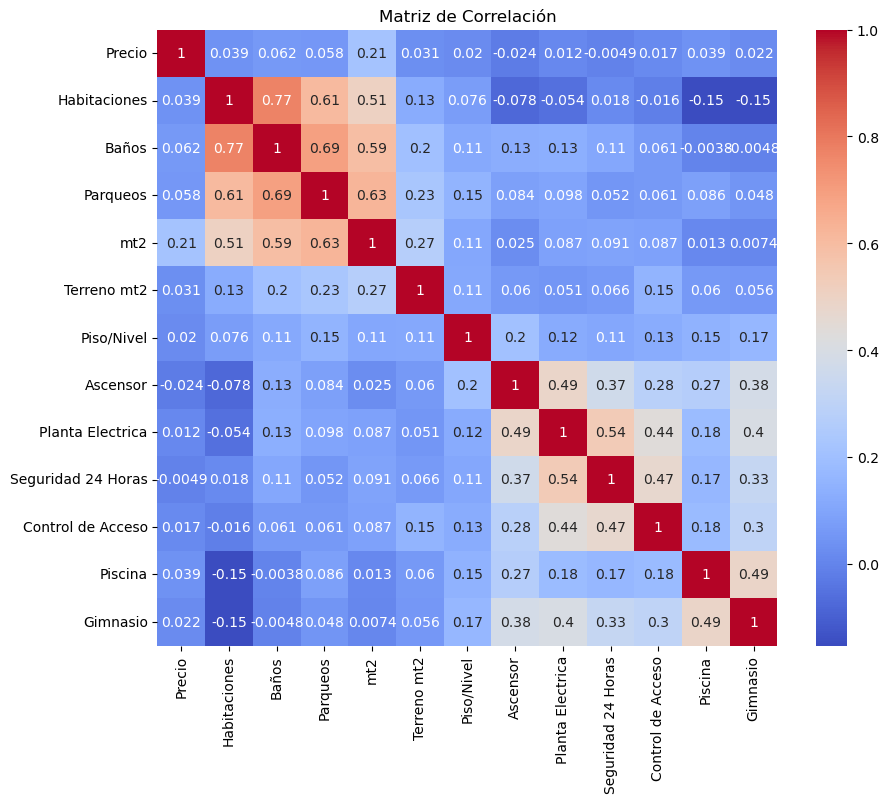

In [7]:

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



# Insights y Conclusiones

1. **Distribución de Precios**: Observamos que los precios están mayormente concentrados en un rango bajo, con algunos valores extremos que indican la presencia de propiedades de lujo.
2. **Relación entre Metros Cuadrados y Precio**: Existe una correlación positiva moderada, lo cual es esperado ya que propiedades más grandes tienden a tener precios más altos.
3. **Impacto del Número de Habitaciones y Baños**: No se observa una fuerte correlación directa, lo que sugiere que otros factores como la ubicación o las amenidades también juegan un papel importante en la determinación del precio.
4. **Amenidades**: La mayoría de las propiedades cuentan con ascensor y seguridad, lo cual podría ser un estándar en los sectores analizados.

Estos insights pueden ayudar a entender mejor los factores que influyen en los precios y características de las propiedades en venta.
